In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from os import listdir
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data = listdir("images")
print(Data)

['TestingData', 'TrainingData']


In [3]:
TrainingData = listdir("images/TrainingData")
print(TrainingData)

['Cancerous', 'Non-Cancerous']


In [4]:
TestingData = listdir("images/TestingData")
print(TestingData)

['Cancerous', 'Non-Cancerous']


In [5]:
CTrainingData = listdir("images/TrainingData/Cancerous")
NCTrainingData1 = listdir("images/TrainingData/Non-Cancerous")
CTestingData = listdir("images/TestingData/Cancerous")
NCTestingData = listdir("images/TestingData/Non-Cancerous")

### Cancerous Training Data

In [6]:
CTrainingData=pd.DataFrame(CTrainingData)
CTrainingData

,0
0,12749_class0.png
1,12749_class1.png
2,12749_class2.png
3,12749_class3.png
4,12749_class4.png
...,...
2116,12817_idx5_x651_y601_class1.png
2117,12817_idx5_x651_y651_class1.png
2118,12817_idx5_x651_y701_class1.png
2119,12817_idx5_x651_y751_class1.png


In [7]:
CTrainingData.shape

(2121, 1)

### Non-Cancerous Training Data

In [8]:
NCTrainingData1=pd.DataFrame(NCTrainingData1)
NCTrainingData1

,0
0,12750_class0.png
1,12750_class1.png
2,12750_class2.png
3,12750_class3.png
4,12750_class4.png
...,...
3771,12817_idx5_x901_y2251_class0.png
3772,12817_idx5_x901_y2301_class0.png
3773,12817_idx5_x951_y2151_class0.png
3774,12817_idx5_x951_y2201_class0.png


In [9]:
NCTrainingData1.shape

(3776, 1)

### Cancerous Testing Data

In [10]:
CTestingData=pd.DataFrame(CTestingData)
CTestingData

,0
0,12818_idx5_x1751_y1651_class1.png
1,12818_idx5_x1751_y1701_class1.png
2,12818_idx5_x1751_y1751_class1.png
3,12818_idx5_x1751_y1801_class1.png
4,12818_idx5_x1751_y1851_class1.png
...,...
497,12820_idx5_x2901_y751_class1.png
498,12820_idx5_x2901_y801_class1.png
499,12820_idx5_x2901_y851_class1.png
500,12820_idx5_x2901_y901_class1.png


In [11]:
CTestingData.shape

(502, 1)

### Non-Cancerous Testing Data

In [12]:
NCTestingData=pd.DataFrame(NCTestingData)
NCTestingData

,0
0,12820_idx5_x1351_y1601_class0.png
1,12820_idx5_x1351_y1651_class0.png
2,12820_idx5_x1351_y1701_class0.png
3,12820_idx5_x1351_y1751_class0.png
4,12820_idx5_x1401_y1251_class0.png
...,...
796,12821_idx5_x751_y751_class0.png
797,12821_idx5_x751_y801_class0.png
798,12821_idx5_x751_y851_class0.png
799,12821_idx5_x751_y901_class0.png


In [13]:
NCTestingData.shape

(801, 1)

### Non-Cancerous Image

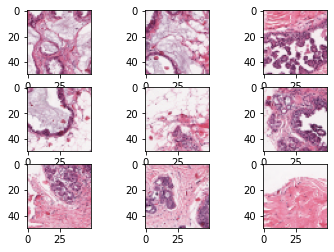

In [14]:
a="images/TrainingData/Non-Cancerous/"
from matplotlib.image import imread
for i in range(9):
	plt.subplot(330 + 1 + i)
	filename = a + "12750_class" + str(i) + '.png'
	image = imread(filename)
	plt.imshow(image)
plt.show()

Non Cancerous Image: (50, 50, 3)


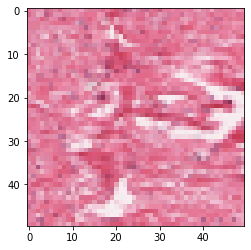

In [15]:
import imageio
img_name = '12750_idx5_x851_y351_class0.png'
im = imageio.imread("./images/TrainingData/Non-Cancerous/" + img_name)
print("Non Cancerous Image: {}".format(im.shape))
plt.imshow(im)
plt.show()

(50, 50)


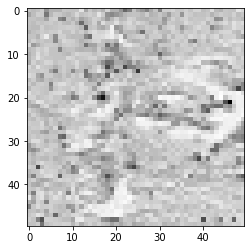

In [16]:
im_red = im[:,:,0]
print(im_red.shape)
plt.imshow(im_red, cmap='gray')

### Cancerous image

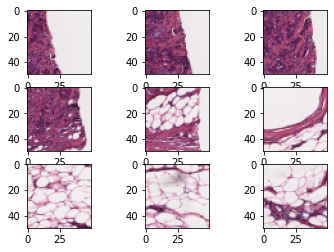

In [17]:
b="images/TrainingData/Cancerous/"
from matplotlib.image import imread
for i in range(9):
	plt.subplot(330 + 1 + i)
	filename = b + "12749_class" + str(i) + '.png'
	image = imread(filename)
	plt.imshow(image)
plt.show()

Non Cancerous Image: (50, 50, 3)


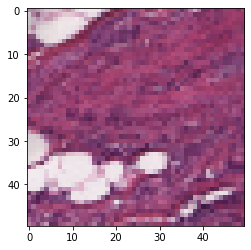

In [18]:
img_name = '12749_idx5_x3401_y1601_class1.png'
im1 = imageio.imread("./images/TrainingData/Cancerous/" + img_name)
print("Non Cancerous Image: {}".format(im1.shape))
plt.imshow(im1)
plt.show()

(50, 50)


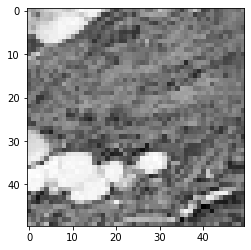

In [19]:
im_red1 = im1[:,:,0]
print(im_red1.shape)
plt.imshow(im_red1, cmap='gray')

In [20]:
img_width, img_height = 50,50

In [21]:
train_data_dir = 'images/TrainingData'
test_data_dir = 'images/TestingData'

nb_train_samples = 5216
nb_validation_samples = 16
epochs = 5
batch_size = 16

In [22]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)



In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [24]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [26]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [27]:
model.layers

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          1

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [31]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [32]:
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=
                                                    (img_width, img_height),batch_size=batch_size,class_mode='binary')

Found 5897 images belonging to 2 classes.


In [33]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1303 images belonging to 2 classes.


In [34]:
train_generator.class_indices

{'Cancerous': 0, 'Non-Cancerous': 1}

In [35]:
result = model.fit(train_generator, epochs=10,validation_data=test_generator)

Epoch 1/10
369/369 [==============================] - 48s 70ms/step - loss: 0.6134 - accuracy: 0.6734 - val_loss: 0.5429 - val_accuracy: 0.7160
Epoch 2/10
369/369 [==============================] - 26s 70ms/step - loss: 0.5609 - accuracy: 0.7308 - val_loss: 0.6104 - val_accuracy: 0.6800
Epoch 3/10
369/369 [==============================] - 24s 64ms/step - loss: 0.5424 - accuracy: 0.7440 - val_loss: 0.4826 - val_accuracy: 0.7521
Epoch 4/10
369/369 [==============================] - 23s 64ms/step - loss: 0.5023 - accuracy: 0.7721 - val_loss: 0.3439 - val_accuracy: 0.8396
Epoch 5/10
369/369 [==============================] - 22s 59ms/step - loss: 0.5084 - accuracy: 0.7725 - val_loss: 0.3827 - val_accuracy: 0.8258
Epoch 6/10
369/369 [==============================] - 20s 55ms/step - loss: 0.4887 - accuracy: 0.7767 - val_loss: 0.3523 - val_accuracy: 0.8450
Epoch 7/10
369/369 [==============================] - 21s 56ms/step - loss: 0.4759 - accuracy: 0.7771 - val_loss: 0.4457 - val_accuracy:

### Deploying App on Anvil

In [36]:
import anvil.server

anvil.server.connect("7QQDT6OHNVV6JG22IM53IUI2-WLAZRRXMG5GYWJFZ")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [37]:
import anvil.media

@anvil.server.callable
def check_cancer(file):
    with anvil.media.TempFile(file) as fileName:
        img = load_img(fileName, target_size= (50, 50))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img/255
        return model.predict(img)